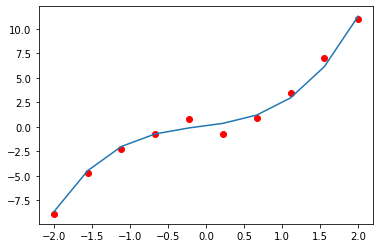

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generating data by first taking equispaced 
# points on the line and then shifting them with a 
# random noise epsilon

x = np.linspace(-2,2,10)

epsilon = np.random.normal(0,1, len(x))

beta = np.asarray([.1, 1, .3, 1])

t = beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3
tnoisy2 = t + epsilon


plt.scatter(x, tnoisy2, c='r')
plt.plot(x, t)
plt.show()

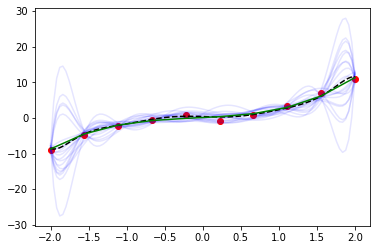

In [2]:

numXP = 20

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


poly = PolynomialFeatures(10)

Xtilde = poly.fit_transform(x.reshape(-1,1))

myRegression = LinearRegression()

xprediction = np.linspace(-2,2,100)

XTildeprediction = poly.fit_transform(xprediction.reshape(-1,1))



plt.scatter(x, tnoisy2, c='r')

predictionSet = np.zeros((len(xprediction), numXP))

for xp in np.arange(numXP):
    
    epsilon = np.random.normal(0,1, len(x))
    tnoisy = t + epsilon
    myRegression.fit(Xtilde, tnoisy)
    
    prediction = myRegression.predict(XTildeprediction)
    
    predictionSet[:,xp] = prediction
    
    plt.plot(xprediction, prediction, c='b', alpha=.1)
    
    
meanModel = np.mean(predictionSet, axis=1)
plt.plot(xprediction, meanModel, 'k--')
plt.plot(x, t, c = 'g')
plt.show()

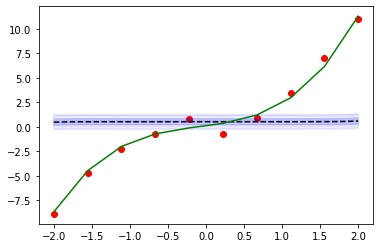

In [10]:

numXP = 20

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import numpy as np


poly = PolynomialFeatures(10)

Xtilde = poly.fit_transform(x.reshape(-1,1))

myRegression = Ridge(alpha=1e8)

xprediction = np.linspace(-2,2,100)

XTildeprediction = poly.fit_transform(xprediction.reshape(-1,1))



plt.scatter(x, tnoisy2, c='r')

predictionSet = np.zeros((len(xprediction), numXP))

for xp in np.arange(numXP):
    
    epsilon = np.random.normal(0,1, len(x))
    tnoisy = t + epsilon
    myRegression.fit(Xtilde, tnoisy)
    
    prediction = myRegression.predict(XTildeprediction)
    
    predictionSet[:,xp] = prediction
    
    plt.plot(xprediction, prediction, c='b', alpha=.1)
    
    
meanModel = np.mean(predictionSet, axis=1)
plt.plot(xprediction, meanModel, 'k--')
plt.plot(x, t, c = 'g')
plt.show()

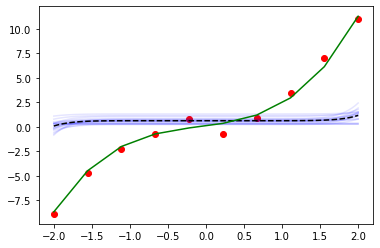

In [17]:

numXP = 20

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore') 

import numpy as np


poly = PolynomialFeatures(10)

Xtilde = poly.fit_transform(x.reshape(-1,1))

myRegression = Lasso(alpha=1000)




plt.scatter(x, tnoisy2, c='r')

predictionSet = np.zeros((len(xprediction), numXP))

for xp in np.arange(numXP):
    
    epsilon = np.random.normal(0,1, len(x))
    tnoisy = t + epsilon
    myRegression.fit(Xtilde, tnoisy)
    
    prediction = myRegression.predict(XTildeprediction)
    
    predictionSet[:,xp] = prediction
    
    plt.plot(xprediction, prediction, c='b', alpha=.1)
    
    
meanModel = np.mean(predictionSet, axis=1)
plt.plot(xprediction, meanModel, 'k--')
plt.plot(x, t, c = 'g')
plt.show()

### Evolution of Bias and Variance as a function of model complexity

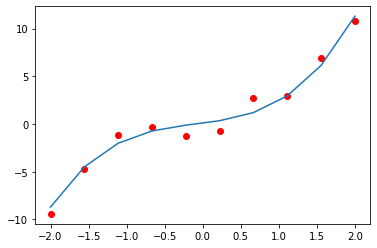

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# generating data by first taking equispaced 
# points on the line and then shifting them with a 
# random noise epsilon

x = np.linspace(-2,2,10)

epsilon = np.random.normal(0,1, len(x))

beta = np.asarray([.1, 1, .3, 1])

t = beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3
tnoisy2 = t + epsilon


plt.scatter(x, tnoisy2, c='r')
plt.plot(x, t)
plt.show()

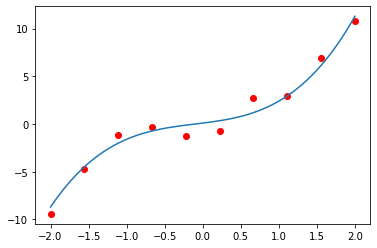

In [32]:
Xtilde = poly.fit_transform(x.reshape(-1,1))
xprediction = np.linspace(-2,2,100)
XTildeprediction = poly.fit_transform(xprediction.reshape(-1,1))


trueT = beta[0] + beta[1]*xprediction + beta[2]*(xprediction**2) + beta[3]*(xprediction**3)

plt.scatter(x, tnoisy2, c='r')
plt.plot(xprediction, trueT)
plt.show()


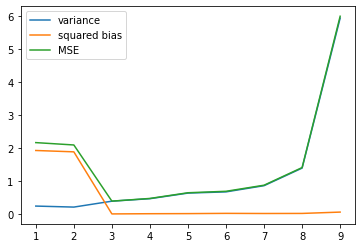

In [73]:
numXP = 50
maxDegree = 10

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np



bias2 = np.zeros((len(xprediction),maxDegree ))
variance = np.zeros((len(xprediction), maxDegree))
MSE = np.zeros((len(xprediction), maxDegree))


for degree in np.arange(maxDegree):
    
    poly = PolynomialFeatures(degree)
    Xtilde = poly.fit_transform(x.reshape(-1,1))
    xprediction = np.linspace(-2,2,100)
    XTildeprediction = poly.fit_transform(xprediction.reshape(-1,1))

    
    myRegression = LinearRegression()
    predictionSet = np.zeros((len(xprediction), numXP))

    for xp in np.arange(numXP):

        epsilon = np.random.normal(0,1, len(x))
        tnoisy = t + epsilon
        myRegression.fit(Xtilde, tnoisy)

        prediction = myRegression.predict(XTildeprediction)

        predictionSet[:,xp] = prediction

    meanModel = np.mean(predictionSet, axis=1)
    
    # define the variance as E{(prediction - E{prediction})**2}
    # as the mean is one dimensional, we first need to replicate 
    # it in order to subtract it from each element in predictionSet
    
    
    variance_tmp = predictionSet - np.matmul(meanModel.reshape(-1,1), 
                                             np.ones((1, np.shape(predictionSet)[1])))  
    
    variance[:, degree] = np.mean(variance_tmp**2, axis=1)
    
    bias2[:,degree] = (meanModel - trueT)**2
    
    MSE[:,degree] = variance[:, degree] + bias2[:,degree]
    

    
plt.plot(np.arange(1,10),(1/len(variance))*np.sum(variance, axis=0)[1:])
plt.plot(np.arange(1,10),(1/len(variance))*np.sum(bias2, axis=0)[1:])
plt.plot(np.arange(1,10),(1/len(variance))*np.sum(MSE, axis=0)[1:])
plt.legend(['variance', 'squared bias', 'MSE'])
plt.show()